In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import requests
import json
import dateutil

In [2]:
plt.rcParams["figure.figsize"] = [10, 10]

In [3]:
!ls ../data/

AgeGroupDetails.csv    IndividualDetails.csv
covid_19_india.csv     population_india_census2011.csv
HospitalBedsIndia.csv  StatewiseTestingDetails.csv
ICMRTestingLabs.csv


In [4]:
age_df = pd.read_csv('../data/AgeGroupDetails.csv')

In [5]:
age_df.head(10)

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [6]:
datetime_parser = lambda dt: datetime.strptime(x, '%Y-%m-%d %H:%M')

In [7]:
covid_df = pd.read_csv('../data/covid_19_india.csv', index_col='Sno')

In [8]:
covid_df.tail(20)

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
2539,01/06/20,8:00 AM,Kerala,-,-,590,9,1269
2540,01/06/20,8:00 AM,Ladakh,-,-,43,0,74
2541,01/06/20,8:00 AM,Madhya Pradesh,-,-,4842,350,8089
2542,01/06/20,8:00 AM,Maharashtra,-,-,29329,2286,67655
2543,01/06/20,8:00 AM,Manipur,-,-,11,0,71
2544,01/06/20,8:00 AM,Meghalaya,-,-,12,1,27
2545,01/06/20,8:00 AM,Mizoram,-,-,1,0,1
2546,01/06/20,8:00 AM,Nagaland,-,-,0,0,43
2547,01/06/20,8:00 AM,Odisha,-,-,1126,7,1948


In [9]:
covid_df.tail()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
2554,01/06/20,8:00 AM,Tripura,-,-,173,0,313
2555,01/06/20,8:00 AM,Uttarakhand,-,-,102,5,907
2556,01/06/20,8:00 AM,Uttar Pradesh,-,-,4709,213,7823
2557,01/06/20,8:00 AM,West Bengal,-,-,2157,317,5501
2558,01/06/20,8:00 AM,Cases being reassigned to states,-,-,0,0,5630


In [10]:
hosp_df = pd.read_csv('../data/HospitalBedsIndia.csv')

In [11]:
hosp_df.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [12]:
icmr_df = pd.read_csv('../data/ICMRTestingLabs.csv')
icmr_df.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


In [13]:
patients_df = pd.read_csv('../data/IndividualDetails.csv')
patients_df.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [14]:
patients_df.tail()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
27885,27886,NaN,26/04/2020,NaN,NaN,NaN,NaN,Delhi,NaN,Hospitalized,26/04/2020,Details awaited
27886,27887,NaN,26/04/2020,NaN,NaN,NaN,NaN,Uttarakhand,NaN,Hospitalized,26/04/2020,Details awaited
27887,27888,NaN,26/04/2020,12,F,NaN,Munger,Bihar,NaN,Hospitalized,26/04/2020,Details awaited
27888,27889,NaN,26/04/2020,13,F,NaN,Munger,Bihar,NaN,Hospitalized,26/04/2020,Details awaited
27889,27890,NaN,26/04/2020,17,F,NaN,Munger,Bihar,NaN,Hospitalized,26/04/2020,Details awaited


In [15]:
patients_df.notes.unique()

array(['Travelled from Wuhan', 'Travelled from Austria, Italy',
       'Travelled from Dubai to Bangalore on 20th Feb, stayed there for 2 days and took a bus to Hyderabad',
       'Travelled from Italy', 'Travelled from Italy, Wife of P6',
       'Family members of P4',
       'Accompanied the Italian tourists, Nationality: Indian',
       'Travelled from Italy PayTm Emp, ', 'Travelled from Iran',
       'Travelled from Thailand and Malaysia', nan,
       'Travelled from Oman to Chennai Airport on 28.02.2020',
       'Travelled from Italy on 29/02/2020 through Doha',
       'Relative and neighbour of P35-P37',
       'Relative  and neighbour of P35-P37', 'No travel history',
       'Travelled from US via London, Mindtree Employee',
       'Travelled from Italy on 07/03/2020 (Parents in isolation)',
       'Travelled from Dubai on 1 March, Husband of P45',
       'Travelled from Dubai on 1 March, Wife of P44',
       'Factory Manager contact with businessman from Italy',
       'Was in 

In [16]:
patients_data = "https://api.covid19india.org/raw_data%d.json"
list_json_data = []

for i in range(1, 6):
    json_response = requests.get(patients_data % i).text
    list_of_patients = json.loads(json_response)['raw_data']
    list_json_data.extend(list_of_patients)

In [17]:
list_json_data[1]

{'agebracket': '',
 'backupnotes': 'Student from Wuhan',
 'contractedfromwhichpatientsuspected': '',
 'currentstatus': 'Recovered',
 'dateannounced': '02/02/2020',
 'detectedcity': 'Alappuzha',
 'detecteddistrict': 'Alappuzha',
 'detectedstate': 'Kerala',
 'estimatedonsetdate': '',
 'gender': '',
 'nationality': 'India',
 'notes': 'Travelled from Wuhan',
 'numcases': '1',
 'patientnumber': '2',
 'source1': 'https://www.indiatoday.in/india/story/kerala-reports-second-case-of-coronavirus-1642494-2020-02-02',
 'source2': 'https://weather.com/en-IN/india/news/news/2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully',
 'source3': '',
 'statecode': 'KL',
 'statepatientnumber': 'KL-AL-P1',
 'statuschangedate': '14/02/2020',
 'typeoftransmission': 'Imported'}

In [18]:
new_patients_df = pd.DataFrame(list_json_data)
new_patients_df.head(5)

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,estimatedonsetdate,...,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,NaN,,...,Travelled from Wuhan,1,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,NaN,,...,Travelled from Wuhan,1,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,NaN,,...,Travelled from Wuhan,1,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,NaN,,...,"Travelled from Austria, Italy",1,4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,NaN,,...,"Travelled from Dubai to Bangalore on 20th Feb,...",1,5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported


In [19]:
state_testing_df = pd.read_csv('../data/StatewiseTestingDetails.csv')
state_testing_df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [20]:
census_df = pd.read_csv('../data/population_india_census2011.csv')
census_df.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


### Data Cleaning

#### I. Covid 19 Data Frame

In [21]:
covid_df = pd.read_csv('../data/covid_19_india.csv', index_col='Sno')

In [22]:
covid_df.dtypes

Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [23]:
covid_df.Date = pd.to_datetime(covid_df.Date, format='%d/%m/%y')

In [24]:
covid_df.head(20)

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3


In [25]:
covid_df = covid_df.rename(columns={"State/UnionTerritory": "State"})

In [26]:
covid_df.loc[:, 'Active'] = covid_df.loc[:, 'Confirmed'] - covid_df.loc[:, 'Deaths'] - covid_df.loc[:, 'Cured']

In [27]:
covid_df = covid_df[['Date', 'State', 'Cured', 'Deaths', 'Confirmed', 'Active']]

In [28]:
covid_df.head()

,Date,State,Cured,Deaths,Confirmed,Active
Sno,,,,,,
1,2020-01-30,Kerala,0,0,1,1
2,2020-01-31,Kerala,0,0,1,1
3,2020-02-01,Kerala,0,0,2,2
4,2020-02-02,Kerala,0,0,3,3
5,2020-02-03,Kerala,0,0,3,3


In [29]:
covid_df.loc[:, "Fatality Rate"] = covid_df['Deaths'] / covid_df['Cured'] * 100

In [30]:
covid_df.tail()

,Date,State,Cured,Deaths,Confirmed,Active,Fatality Rate
Sno,,,,,,,
2554,2020-06-01,Tripura,173,0,313,140,0.000000
2555,2020-06-01,Uttarakhand,102,5,907,800,4.901961
2556,2020-06-01,Uttar Pradesh,4709,213,7823,2901,4.523253
2557,2020-06-01,West Bengal,2157,317,5501,3027,14.696338
2558,2020-06-01,Cases being reassigned to states,0,0,5630,5630,NaN


In [31]:
covid_df = covid_df[~(covid_df.State == 'Cases being reassigned to states')]

In [32]:
latest_df = covid_df[covid_df.Date == '2020-06-01']

### Top 10 States with Max Fatalities

In [33]:
latest_df = latest_df.sort_values(by='Deaths', ascending=False)

In [34]:
top_10_states_with_highest_fatalities = latest_df[:10]

In [35]:
top_10_states_with_highest_fatalities.head()

,Date,State,Cured,Deaths,Confirmed,Active,Fatality Rate
Sno,,,,,,,
2542,2020-06-01,Maharashtra,29329,2286,67655,36040,7.794333
2533,2020-06-01,Gujarat,9919,1038,16779,5822,10.464765
2531,2020-06-01,Delhi,8478,473,19844,10893,5.579146
2541,2020-06-01,Madhya Pradesh,4842,350,8089,2897,7.228418
2557,2020-06-01,West Bengal,2157,317,5501,3027,14.696338


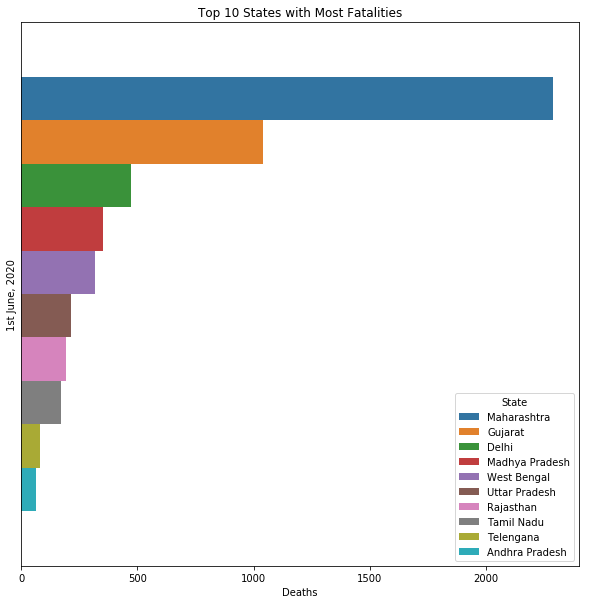

In [36]:
sns.barplot(y=top_10_states_with_highest_fatalities.Date, x=top_10_states_with_highest_fatalities.Deaths, hue=top_10_states_with_highest_fatalities.State, orient='h')
plt.title('Top 10 States with Most Fatalities')
plt.ylabel('1st June, 2020')
plt.yticks([])
plt.show()

### Top 10 States with Highest Fatality Rates

In [37]:
latest_df = latest_df.sort_values(by='Fatality Rate', ascending=False)

In [38]:
top_10_states_with_highest_fatality_rate = latest_df[:10]

In [39]:
top_10_states_with_highest_fatality_rate.head()

,Date,State,Cured,Deaths,Confirmed,Active,Fatality Rate
Sno,,,,,,,
2557,2020-06-01,West Bengal,2157,317,5501,3027,14.696338
2533,2020-06-01,Gujarat,9919,1038,16779,5822,10.464765
2544,2020-06-01,Meghalaya,12,1,27,14,8.333333
2542,2020-06-01,Maharashtra,29329,2286,67655,36040,7.794333
2541,2020-06-01,Madhya Pradesh,4842,350,8089,2897,7.228418


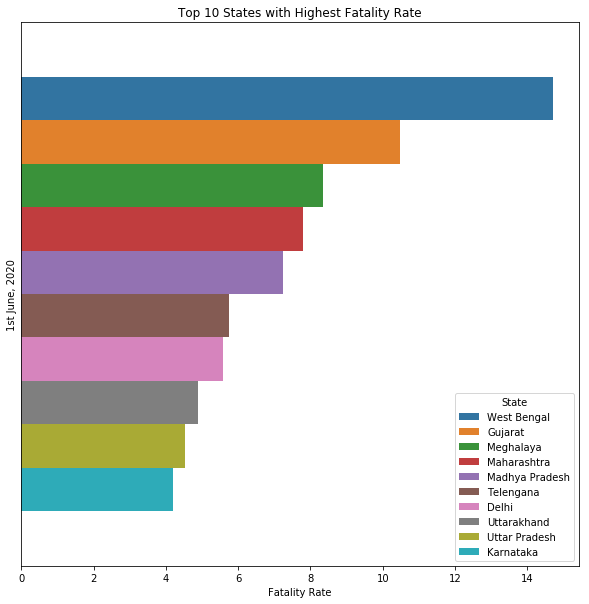

In [40]:
sns.barplot(y=top_10_states_with_highest_fatality_rate.Date, x=top_10_states_with_highest_fatality_rate['Fatality Rate'], hue=top_10_states_with_highest_fatality_rate.State, orient='h')
plt.title('Top 10 States with Highest Fatality Rate')
plt.ylabel('1st June, 2020')
plt.yticks([])
plt.show()

### Finding

- Maharashtra, having the highest number of fatalities due to Covid-19, has 4th highest mortality rate, since rate of recovery is high.
- West Bengal, having 5th highest number of fatalities, has highest mortality rate.

In [41]:
top_7_states = ["Maharashtra", 'Gujarat', 'Madhya Pradesh', 'Delhi', 'Madhya Pradesh', 'West Bengal', 'Uttar Pradesh']

In [42]:
top_7_states_df = covid_df[covid_df.State.isin(top_7_states)]
top_7_states_df.head()

,Date,State,Cured,Deaths,Confirmed,Active,Fatality Rate
Sno,,,,,,,
35,2020-03-02,Delhi,0,0,1,1,NaN
39,2020-03-03,Delhi,0,0,1,1,NaN
40,2020-03-04,Uttar Pradesh,0,0,6,6,NaN
43,2020-03-04,Delhi,0,0,1,1,NaN
46,2020-03-05,Delhi,0,0,2,2,NaN


In [43]:
top_7_states_df = top_7_states_df.set_index('Date')

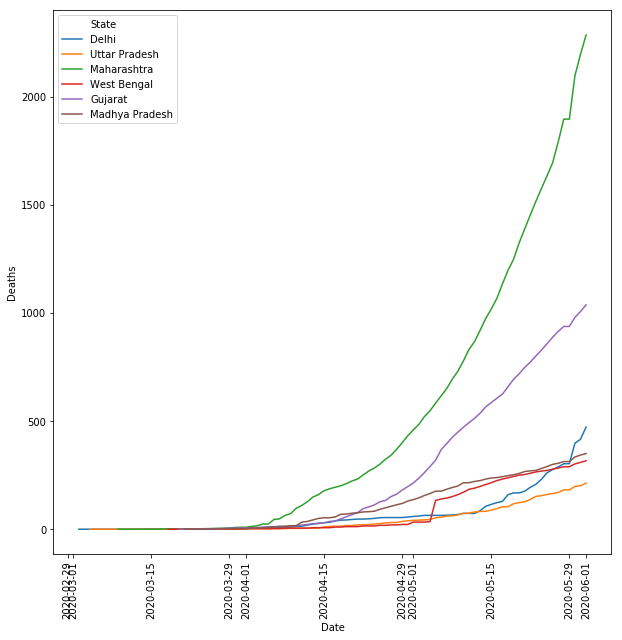

In [44]:
sns.lineplot(x=top_7_states_df.index, y=top_7_states_df.Deaths, hue=top_7_states_df.State)
plt.xticks(rotation=90)
plt.show()

#### Finding:

- Uttar Pradesh, having highest population amongst Indian states has least number of fatalities.

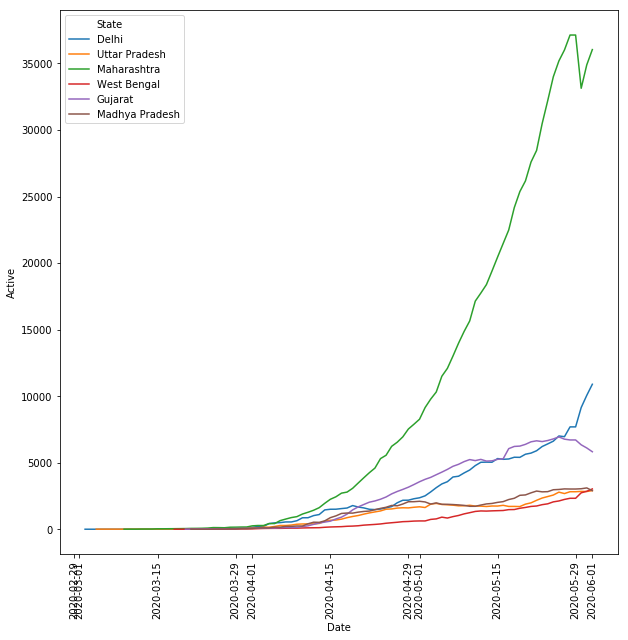

In [45]:
sns.lineplot(x=top_7_states_df.index, y=top_7_states_df.Active, hue=top_7_states_df.State)
plt.xticks(rotation=90)
plt.show()

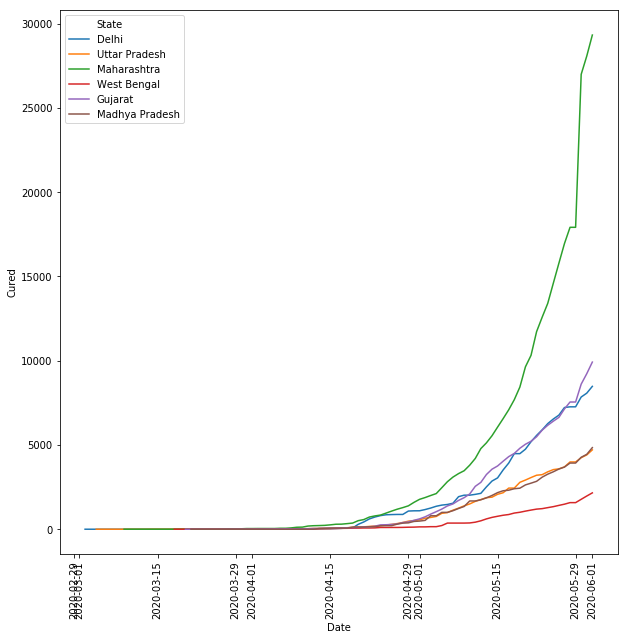

In [46]:
sns.lineplot(x=top_7_states_df.index, y=top_7_states_df.Cured, hue=top_7_states_df.State)
plt.xticks(rotation=90)
plt.show()

#### Finding:
- West Bengal is one of the states with least recovery rate.

#### Patients Df

In [47]:
new_patients_df = pd.DataFrame(list_json_data)

In [48]:
new_patients_df.head()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,estimatedonsetdate,...,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,NaN,,...,Travelled from Wuhan,1,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,NaN,,...,Travelled from Wuhan,1,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,NaN,,...,Travelled from Wuhan,1,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,NaN,,...,"Travelled from Austria, Italy",1,4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,NaN,,...,"Travelled from Dubai to Bangalore on 20th Feb,...",1,5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported


In [49]:
new_patients_df.dtypes

agebracket                             object
backupnotes                            object
contractedfromwhichpatientsuspected    object
currentstatus                          object
dateannounced                          object
detectedcity                           object
detecteddistrict                       object
detectedstate                          object
entryid                                object
estimatedonsetdate                     object
gender                                 object
nationality                            object
notes                                  object
numcases                               object
patientnumber                          object
source1                                object
source2                                object
source3                                object
statecode                              object
statepatientnumber                     object
statuschangedate                       object
typeoftransmission                

In [50]:
new_patients_df[new_patients_df['numcases'] == ''] = 0

In [51]:
new_patients_df[new_patients_df['patientnumber'] == ''] = 0

In [52]:
new_patients_df[['numcases', 'patientnumber']] = new_patients_df[['numcases', 'patientnumber']].astype(int)

In [53]:
new_patients_df[new_patients_df.currentstatus == 'Deceased'].groupby('detectedcity')['numcases'].sum().sort_values(ascending=False)

detectedcity
                      4922
Vasai Virar              5
Chennai                  4
Mumbai                   3
Pune                     3
Davanagere               2
Ramganj                  2
Kalaburagi               2
Delhi                    1
Jiyaguda                 1
Jharpada                 1
Janakpuri                1
Heeda Ki Mori            1
Hazi colony              1
Hadapsar-Pune            1
Hadapsar - Pune          1
Gogri                    1
Dum Dum                  1
                         1
Dharmadam                1
Ahmedabad                1
Aland                    1
Chitaguppa               1
71                       1
C Scheme                 1
Bhawani Peth Pune        1
Bharat Nagar             1
Belchi                   1
Baramati                 1
Bantwala                 1
                      ... 
Ziaguda                  1
Kangra                   1
Parvati - Pune           1
Vanasthalipuram          1
Ujjain                   1
Tumkur         

In [54]:
new_patients_df.head()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,estimatedonsetdate,...,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,NaN,,...,Travelled from Wuhan,1,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,NaN,,...,Travelled from Wuhan,1,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,NaN,,...,Travelled from Wuhan,1,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,NaN,,...,"Travelled from Austria, Italy",1,4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,NaN,,...,"Travelled from Dubai to Bangalore on 20th Feb,...",1,5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported


In [55]:
# new_patients_df = new_patients_df[~(new_patients_df.dateannounced == '')]
# new_patients_df = new_patients_df[~(new_patients_df.dateannounced == 0)]

In [56]:
new_patients_df.dateannounced.unique()

array(['30/01/2020', '02/02/2020', '03/02/2020', '02/03/2020',
       '03/03/2020', '04/03/2020', '05/03/2020', '06/03/2020',
       '07/03/2020', '08/03/2020', '09/03/2020', '10/03/2020',
       '11/03/2020', '12/03/2020', '13/03/2020', '14/03/2020',
       '15/03/2020', '16/03/2020', '17/03/2020', '18/03/2020',
       '19/03/2020', '20/03/2020', '21/03/2020', '22/03/2020',
       '23/03/2020', '24/03/2020', '25/03/2020', '26/03/2020',
       '27/03/2020', '28/03/2020', '29/03/2020', '30/03/2020',
       '31/03/2020', '01/04/2020', '02/04/2020', '03/04/2020',
       '04/04/2020', '05/04/2020', '06/04/2020', '07/04/2020',
       '08/04/2020', '09/04/2020', '10/04/2020', '11/04/2020',
       '12/04/2020', '13/04/2020', '14/04/2020', '15/04/2020',
       '16/04/2020', '17/04/2020', '18/04/2020', '19/04/2020', 0,
       '20/04/2020', '21/04/2020', '22/04/2020', '23/04/2020',
       '24/04/2020', '25/04/2020', '26/04/2020', '27/04/2020',
       '28/04/2020', '29/04/2020', '30/04/2020', '01

In [57]:
# new_patients_df = new_patients_df[~(new_patients_df.statuschangedate == '')]

In [58]:
# new_patients_df.dateannounced = pd.to_datetime(new_patients_df.dateannounced, format='%d/%m/%Y')

In [59]:
new_patients_df.dtypes

agebracket                             object
backupnotes                            object
contractedfromwhichpatientsuspected    object
currentstatus                          object
dateannounced                          object
detectedcity                           object
detecteddistrict                       object
detectedstate                          object
entryid                                object
estimatedonsetdate                     object
gender                                 object
nationality                            object
notes                                  object
numcases                                int64
patientnumber                           int64
source1                                object
source2                                object
source3                                object
statecode                              object
statepatientnumber                     object
statuschangedate                       object
typeoftransmission                

In [60]:
new_patients_df_min = new_patients_df[['currentstatus', 'detectedcity', 
                                       'detecteddistrict', 'detectedstate',
                                      'gender', 'nationality', 'numcases', 'patientnumber', 'statepatientnumber'
                                       ,'typeoftransmission']]

In [61]:
new_patients_df_min.currentstatus.unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated', 0,
       'Migrated_Other', ''], dtype=object)

In [62]:
new_patients_df_min.head()

,currentstatus,detectedcity,detecteddistrict,detectedstate,gender,nationality,numcases,patientnumber,statepatientnumber,typeoftransmission
0,Recovered,Thrissur,Thrissur,Kerala,F,India,1,1,KL-TS-P1,Imported
1,Recovered,Alappuzha,Alappuzha,Kerala,,India,1,2,KL-AL-P1,Imported
2,Recovered,Kasaragod,Kasaragod,Kerala,,India,1,3,KL-KS-P1,Imported
3,Recovered,East Delhi (Mayur Vihar),East Delhi,Delhi,M,India,1,4,DL-P1,Imported
4,Recovered,Hyderabad,Hyderabad,Telangana,M,India,1,5,TS-P1,Imported


In [63]:
new_patients_df_min[new_patients_df_min.currentstatus == 'Deceased'].head()

,currentstatus,detectedcity,detecteddistrict,detectedstate,gender,nationality,numcases,patientnumber,statepatientnumber,typeoftransmission
72,Deceased,Janakpuri,South West Delhi,Delhi,F,India,1,72,DL-P6,Local
76,Deceased,Mumbai,Mumbai,Maharashtra,M,India,1,77,,Imported
81,Deceased,Kalaburagi,Kalaburagi,Karnataka,M,India,1,74,KA-P6,Imported
181,Deceased,Banga,Shahid Bhagat Singh Nagar,Punjab,M,India,1,182,PJ-P2,Imported
269,Deceased,Mumbai,Mumbai,Maharashtra,M,India,1,270,,Imported


In [64]:
new_patients_df_min_deceased = new_patients_df_min[(new_patients_df_min.currentstatus == 'Deceased') & (new_patients_df_min.numcases > 0)]

In [65]:
new_patients_df_min_deceased = new_patients_df_min_deceased[~(new_patients_df_min_deceased.detecteddistrict == '')] 

### Top 5 districts with maximum fatalities in India

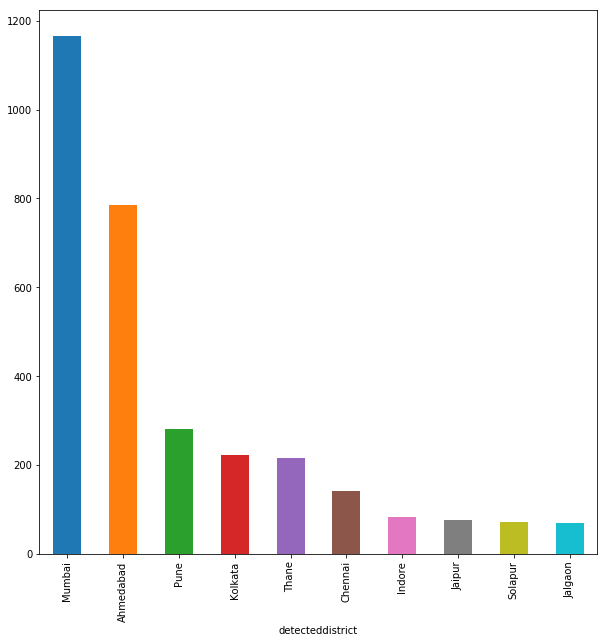

In [66]:
new_patients_df_min_deceased.groupby(['detecteddistrict'])['numcases'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

### Statewise Testing

In [67]:
state_testing_df.dtypes

Date             object
State            object
TotalSamples    float64
Negative        float64
Positive        float64
dtype: object

In [68]:
state_testing_df.Date = pd.to_datetime(state_testing_df.Date, format='%Y-%m-%d')

In [69]:
state_testing_df = state_testing_df.set_index('Date')

In [70]:
state_testing_df.describe()

,TotalSamples,Negative,Positive
count,1600.000000,1270.000000,1591.000000
mean,53222.768750,53044.739370,2073.120679
std,82613.927507,83277.376599,5709.301438
min,58.000000,0.000000,0.000000
25%,3680.750000,3860.000000,33.000000
50%,16378.500000,15803.500000,287.000000
75%,65908.750000,62487.250000,1655.000000
max,491962.000000,468940.000000,65168.000000


In [71]:
state_testing_df.isna().sum()

State             0
TotalSamples      0
Negative        330
Positive          9
dtype: int64

In [72]:
state_testing_df[state_testing_df['Positive'].isna()]

,State,TotalSamples,Negative,Positive
Date,,,,
2020-05-31,Bihar,75737.0,NaN,NaN
2020-04-01,Delhi,2621.0,NaN,NaN
2020-04-05,Maharashtra,16008.0,14837.0,NaN
2020-04-04,West Bengal,1042.0,NaN,NaN
2020-04-06,West Bengal,1301.0,NaN,NaN
2020-04-07,West Bengal,1487.0,NaN,NaN
2020-04-09,West Bengal,1889.0,NaN,NaN
2020-04-10,West Bengal,2095.0,NaN,NaN
2020-05-01,West Bengal,18566.0,NaN,NaN


In [73]:
state_testing_df['Negative'] = state_testing_df['TotalSamples'] - state_testing_df['Positive']

In [74]:
state_testing_df.isna().sum()

State           0
TotalSamples    0
Negative        9
Positive        9
dtype: int64

In [75]:
state_testing_df = state_testing_df[~(state_testing_df.Positive.isna())]

In [76]:
state_testing_df.head()

,State,TotalSamples,Negative,Positive
Date,,,,
2020-04-17,Andaman and Nicobar Islands,1403.0,1391.0,12.0
2020-04-24,Andaman and Nicobar Islands,2679.0,2652.0,27.0
2020-04-27,Andaman and Nicobar Islands,2848.0,2815.0,33.0
2020-05-01,Andaman and Nicobar Islands,3754.0,3721.0,33.0
2020-05-16,Andaman and Nicobar Islands,6677.0,6644.0,33.0


In [77]:
covid_temp = covid_df

In [78]:
covid_temp = covid_temp.set_index('Date')

In [79]:
covid_temp.head()

,State,Cured,Deaths,Confirmed,Active,Fatality Rate
Date,,,,,,
2020-01-30,Kerala,0,0,1,1,NaN
2020-01-31,Kerala,0,0,1,1,NaN
2020-02-01,Kerala,0,0,2,2,NaN
2020-02-02,Kerala,0,0,3,3,NaN
2020-02-03,Kerala,0,0,3,3,NaN


In [80]:
len(covid_temp.loc['2020-04-01'])

29

In [81]:
len(state_testing_df.loc['2020-04-01'])

2

In [82]:
merged_df = pd.merge(covid_temp, state_testing_df, how='inner', left_index=True, right_index=True, on='State')

In [83]:
merged_df.tail(20)

,State,Cured,Deaths,Confirmed,Active,Fatality Rate,TotalSamples,Negative,Positive
Date,,,,,,,,,
2020-05-31,West Bengal,1970,309,5130,2851,15.685279,171045.0,168599.0,2446.0
2020-05-31,West Bengal,1970,309,5130,2851,15.685279,65886.0,65276.0,610.0
2020-05-31,West Bengal,1970,309,5130,2851,15.685279,293575.0,290354.0,3221.0
2020-05-31,West Bengal,1970,309,5130,2851,15.685279,77508.0,76238.0,1270.0
2020-05-31,West Bengal,1970,309,5130,2851,15.685279,7354.0,7277.0,77.0
2020-05-31,West Bengal,1970,309,5130,2851,15.685279,167808.0,159719.0,8089.0
2020-05-31,West Bengal,1970,309,5130,2851,15.685279,463177.0,398009.0,65168.0
2020-05-31,West Bengal,1970,309,5130,2851,15.685279,7781.0,7754.0,27.0
2020-05-31,West Bengal,1970,309,5130,2851,15.685279,777.0,776.0,1.0


In [84]:
state_testing_df.loc['2020-05-31']

,State,TotalSamples,Negative,Positive
Date,,,,
2020-05-31,Andhra Pradesh,372748.0,369703.0,3045.0
2020-05-31,Assam,109097.0,107825.0,1272.0
2020-05-31,Chandigarh,4785.0,4492.0,293.0
2020-05-31,Chhattisgarh,69152.0,68660.0,492.0
2020-05-31,Delhi,212784.0,192940.0,19844.0
2020-05-31,Goa,19491.0,19420.0,71.0
2020-05-31,Haryana,118138.0,116047.0,2091.0
2020-05-31,Himachal Pradesh,37168.0,36837.0,331.0
2020-05-31,Jammu and Kashmir,171045.0,168599.0,2446.0


In [85]:
state_testing_df.head()

,State,TotalSamples,Negative,Positive
Date,,,,
2020-04-17,Andaman and Nicobar Islands,1403.0,1391.0,12.0
2020-04-24,Andaman and Nicobar Islands,2679.0,2652.0,27.0
2020-04-27,Andaman and Nicobar Islands,2848.0,2815.0,33.0
2020-05-01,Andaman and Nicobar Islands,3754.0,3721.0,33.0
2020-05-16,Andaman and Nicobar Islands,6677.0,6644.0,33.0


In [86]:
len(merged_df.loc['2020-04-01'])

58

In [87]:
len(state_testing_df.loc['2020-04-24'])

27

In [88]:
len(covid_temp.loc['2020-04-24'])

32

In [89]:
len(merged_df.loc['2020-04-24'])

864

In [90]:
state_testing_temp = state_testing_df

In [91]:
state_testing_temp = state_testing_temp.set_index(['State'], append=True)

In [92]:
state_testing_temp.head()

,,TotalSamples,Negative,Positive
Date,State,,,
2020-04-17,Andaman and Nicobar Islands,1403.0,1391.0,12.0
2020-04-24,Andaman and Nicobar Islands,2679.0,2652.0,27.0
2020-04-27,Andaman and Nicobar Islands,2848.0,2815.0,33.0
2020-05-01,Andaman and Nicobar Islands,3754.0,3721.0,33.0
2020-05-16,Andaman and Nicobar Islands,6677.0,6644.0,33.0


In [93]:
covid_temp.head()

,State,Cured,Deaths,Confirmed,Active,Fatality Rate
Date,,,,,,
2020-01-30,Kerala,0,0,1,1,NaN
2020-01-31,Kerala,0,0,1,1,NaN
2020-02-01,Kerala,0,0,2,2,NaN
2020-02-02,Kerala,0,0,3,3,NaN
2020-02-03,Kerala,0,0,3,3,NaN


In [94]:
covid_temp = covid_temp.set_index(['State'], append=True)

In [95]:
covid_temp.head()

,,Cured,Deaths,Confirmed,Active,Fatality Rate
Date,State,,,,,
2020-01-30,Kerala,0,0,1,1,NaN
2020-01-31,Kerala,0,0,1,1,NaN
2020-02-01,Kerala,0,0,2,2,NaN
2020-02-02,Kerala,0,0,3,3,NaN
2020-02-03,Kerala,0,0,3,3,NaN


In [96]:
state_testing_df.loc['2020-04-02']

,State,TotalSamples,Negative,Positive
Date,,,,
2020-04-02,Andhra Pradesh,1800.0,1668.0,132.0
2020-04-02,Assam,962.0,946.0,16.0
2020-04-02,Chandigarh,124.0,106.0,18.0
2020-04-02,Chhattisgarh,1232.0,1223.0,9.0
2020-04-02,Goa,220.0,215.0,5.0
2020-04-02,Kerala,8456.0,8170.0,286.0
2020-04-02,Punjab,1434.0,1397.0,37.0
2020-04-02,Uttarakhand,678.0,671.0,7.0


In [97]:
merged_df = pd.merge(covid_temp, state_testing_temp, left_index=True, right_index=True, how='left').fillna(0)

In [98]:
merged_df = merged_df.sort_index(level=0, ascending=False)

### Day wise Covid-19 statistics for each State

In [99]:
merged_df.head(20)

Cured  Deaths  Confirmed  Active  Fatality Rate  \
Date       State                                                             
2020-06-01 West Bengal      2157     317       5501    3027      14.696338   
           Uttarakhand       102       5        907     800       4.901961   
           Uttar Pradesh    4709     213       7823    2901       4.523253   
           Tripura           173       0        313     140       0.000000   
           Telengana        1428      82       2698    1188       5.742297   
           Tamil Nadu      12757     173      22333    9403       1.356118   
           Sikkim              0       0          1       1       0.000000   
           Rajasthan        5927     194       8831    2710       3.273157   
           Punjab           1987      45       2263     231       2.264721   
           Puducherry         25       0         70      45       0.000000   
           Odisha           1126       7       1948     815       0.621670   
           Nagaland            0       0         43      43       0.000000   
           Mizoram             1       0          1       0       0.000000   
           Meghalaya          12       1         27      14       8.333333   
           Manipur            11       0         71      60       0.000000   
           Maharashtra     29329    2286      67655   36040       7.794333   
           Madhya Pradesh   4842     350       8089    2897       7.228418   
           Ladakh             43       0         74      31       0.000000   
           Kerala            590       9       1269     670       1.525424   
           Karnataka        1218      51       3221    1952       4.187192   

                           TotalSamples  Negative  Positive  
Date       State                                             
2020-06-01 West Bengal              0.0       0.0       0.0  
           Uttarakhand              0.0       0.0       0.0  
           Uttar Pradesh            0.0       0.0       0.0  
           Tripura                  0.0       0.0       0.0  
           Telengana                0.0       0.0       0.0  
           Tamil Nadu               0.0       0.0       0.0  
           Sikkim                   0.0       0.0       0.0  
           Rajasthan                0.0       0.0       0.0  
           Punjab                   0.0       0.0       0.0  
           Puducherry               0.0       0.0       0.0  
           Odisha                   0.0       0.0       0.0  
           Nagaland                 0.0       0.0       0.0  
           Mizoram                  0.0       0.0       0.0  
           Meghalaya                0.0       0.0       0.0  
           Manipur                  0.0       0.0       0.0  
           Maharashtra              0.0       0.0       0.0  
           Madhya Pradesh           0.0       0.0       0.0  
           Ladakh                   0.0       0.0       0.0  
           Kerala                   0.0       0.0       0.0  
           Karnataka                0.0       0.0       0.0

In [100]:
merged_df.head(50)

Cured  Deaths  Confirmed  Active  \
Date       State                                                           
2020-06-01 West Bengal                   2157     317       5501    3027   
           Uttarakhand                    102       5        907     800   
           Uttar Pradesh                 4709     213       7823    2901   
           Tripura                        173       0        313     140   
           Telengana                     1428      82       2698    1188   
           Tamil Nadu                   12757     173      22333    9403   
           Sikkim                           0       0          1       1   
           Rajasthan                     5927     194       8831    2710   
           Punjab                        1987      45       2263     231   
           Puducherry                      25       0         70      45   
           Odisha                        1126       7       1948     815   
           Nagaland                         0       0         43      43   
           Mizoram                          1       0          1       0   
           Meghalaya                       12       1         27      14   
           Manipur                         11       0         71      60   
           Maharashtra                  29329    2286      67655   36040   
           Madhya Pradesh                4842     350       8089    2897   
           Ladakh                          43       0         74      31   
           Kerala                         590       9       1269     670   
           Karnataka                     1218      51       3221    1952   
           Jharkhand                      256       5        610     349   
           Jammu and Kashmir              927      28       2446    1491   
           Himachal Pradesh               120       5        331     206   
           Haryana                       1048      20       2091    1023   
           Gujarat                       9919    1038      16779    5822   
           Goa                             42       0         70      28   
           Delhi                         8478     473      19844   10893   
           Dadar Nagar Haveli               0       0          2       2   
           Chhattisgarh                   115       1        498     382   
           Chandigarh                     199       4        293      90   
           Bihar                         1710      21       3815    2084   
           Assam                          185       4       1272    1083   
           Arunachal Pradesh                1       0          4       3   
           Andhra Pradesh                2349      62       3679    1268   
           Andaman and Nicobar Islands     33       0         33       0   
2020-05-31 West Bengal                   1970     309       5130    2851   
           Uttarakhand                    102       5        749     642   
           Uttar Pradesh                 4410     201       7445    2834   
           Tripura                        172       0        268      96   
           Telengana                     1412      77       2499    1010   
           Tamil Nadu                   12000     160      21184    9024   
           Sikkim                           0       0          1       1   
           Rajasthan                     5739     193       8617    2685   
           Punjab                        1967      44       2233     222   
           Puducherry                      14       0         51      37   
           Odisha                        1050       7       1819     762   
           Nagaland                         0       0         36      36   
           Mizoram                          1       0          1       0   
           Meghalaya                       12       1         27      14   
           Manipur                          8       0         62      54   

                                        Fatality Rate  TotalSamples  Negative  \
Date  

### State Level Aggregated DF with Census DF and Covid Counts

In [101]:
census_df.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [102]:
census_df = census_df.rename(columns={"State / Union Territory": "State"}).set_index('State').drop(columns='Sno')

In [103]:
census_df.head()

,Population,Rural population,Urban population,Area,Density,Gender Ratio
State,,,,,,
Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [104]:
aggregated_df = pd.merge(merged_df, census_df, left_index=True, right_index=True)

In [105]:
aggregated_df.head(20)

Cured  Deaths  Confirmed  Active  Fatality Rate  \
Date       State                                                             
2020-06-01 West Bengal      2157     317       5501    3027      14.696338   
           Uttarakhand       102       5        907     800       4.901961   
           Uttar Pradesh    4709     213       7823    2901       4.523253   
           Tripura           173       0        313     140       0.000000   
           Telengana        1428      82       2698    1188       5.742297   
           Tamil Nadu      12757     173      22333    9403       1.356118   
           Sikkim              0       0          1       1       0.000000   
           Rajasthan        5927     194       8831    2710       3.273157   
           Punjab           1987      45       2263     231       2.264721   
           Puducherry         25       0         70      45       0.000000   
           Odisha           1126       7       1948     815       0.621670   
           Nagaland            0       0         43      43       0.000000   
           Mizoram             1       0          1       0       0.000000   
           Meghalaya          12       1         27      14       8.333333   
           Manipur            11       0         71      60       0.000000   
           Maharashtra     29329    2286      67655   36040       7.794333   
           Madhya Pradesh   4842     350       8089    2897       7.228418   
           Ladakh             43       0         74      31       0.000000   
           Kerala            590       9       1269     670       1.525424   
           Karnataka        1218      51       3221    1952       4.187192   

                           TotalSamples  Negative  Positive  Population  \
Date       State                                                          
2020-06-01 West Bengal              0.0       0.0       0.0    91276115   
           Uttarakhand              0.0       0.0       0.0    10086292   
           Uttar Pradesh            0.0       0.0       0.0   199812341   
           Tripura                  0.0       0.0       0.0     3673917   
           Telengana                0.0       0.0       0.0    35003674   
           Tamil Nadu               0.0       0.0       0.0    72147030   
           Sikkim                   0.0       0.0       0.0      610577   
           Rajasthan                0.0       0.0       0.0    68548437   
           Punjab                   0.0       0.0       0.0    27743338   
           Puducherry               0.0       0.0       0.0     1247953   
           Odisha                   0.0       0.0       0.0    41974218   
           Nagaland                 0.0       0.0       0.0     1978502   
           Mizoram                  0.0       0.0       0.0     1097206   
           Meghalaya                0.0       0.0       0.0     2966889   
           Manipur                  0.0       0.0       0.0     2570390   
           Maharashtra              0.0       0.0       0.0   112374333   
           Madhya Pradesh           0.0       0.0       0.0    72626809   
           Ladakh                   0.0       0.0       0.0      274000   
           Kerala                   0.0       0.0       0.0    33406061   
           Karnataka                0.0       0.0       0.0    61095297   

                           Rural population  Urban population  \
Date       State                                                
2020-06-01 West Bengal             62183113          29093002   
           Uttarakhand              7036954           3049338   
           Uttar Pradesh          155317278          44495063   
           Tripura                  2712464            961453   
           Telengana               21395009          13608665   
           Tamil Nadu              37229590          34917440   
           Sikkim                    456999            153578   
           Rajasthan               51500352          17048085   
         